---
CSC 268 Lab 12: Transform Tricks 1
---

In this lab we will explore several image transforms that can save significant computation time.

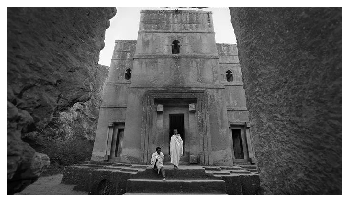

In [8]:
import cv2 as cv
import numpy as np
import scipy
from skimage.morphology import (erosion, dilation, closing, opening, skeletonize, disk)
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
mpl.rc('image', cmap='gray')

def imshow(img,cmap=None):
    plt.imshow(img,cmap=cmap,interpolation='none')
    plt.axis('off')
    plt.show()
    
lb = cv.imread('lalibela.jpg',0).astype(np.float32)/255.0
imshow(lb)

(393, 700)


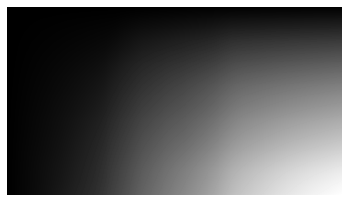

In [2]:
print(lb.shape)
iilb = np.cumsum(np.cumsum(lb,0),1)
imshow(iilb)

In [3]:
# TODO:  Use timer.time() to measure and compare the speed of these two methods for finding the sum.

s1 = lb[50:350,50:650].sum()
s2 = iilb[49,49]+iilb[349,649]-iilb[49,649]-iilb[349,49]

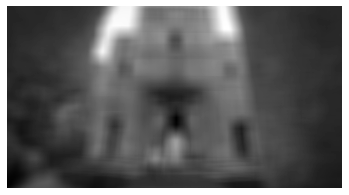

(array([45]), array([443]))
(array([357]), array([0]))


In [32]:
# TODO: Find the coordinates of the 50x50 square with the lightest and darkest average intensity
# Hint:  you can get all the 50x50 sums by combining iilb[:-50,:-50], iilb[50:,50:], and two other slices of iilb.
s50 = iilb[:-50,:-50]+iilb[50:,50:]-iilb[50:,:-50]-iilb[:-50,50:]
imshow(s50)
print(np.nonzero(s50==s50.max()))
print(np.nonzero(s50==s50.min()))

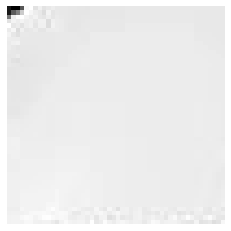

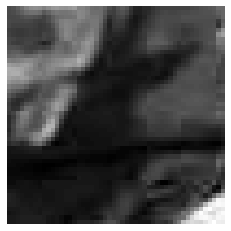

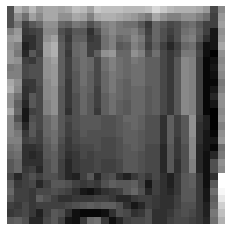

In [42]:
imshow(lb[18:68,221:271])
imshow(lb[328:378,0:50])

In [27]:
m = np.array([[1,0,0,0,0,0,1],[0,1,0,0,0,1,0],[0,0,1,0,1,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0]])
print(m)
print(scipy.ndimage.distance_transform_edt(1-m))

[[1 0 0 0 0 0 1]
 [0 1 0 0 0 1 0]
 [0 0 1 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]
[[0.         1.         1.41421356 2.23606798 2.82842712 3.
  3.        ]
 [1.         0.         1.         1.41421356 2.         2.
  2.        ]
 [1.41421356 1.         0.         1.         1.         1.
  1.        ]
 [2.23606798 1.41421356 1.         0.         0.         0.
  0.        ]
 [1.41421356 1.         0.         1.         1.         1.
  1.        ]
 [1.         0.         1.         1.41421356 2.         2.
  2.        ]
 [0.         1.         1.41421356 2.23606798 2.82842712 3.
  3.        ]]


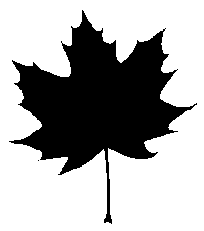

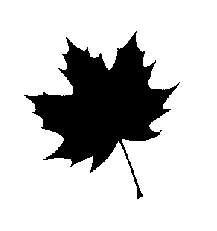

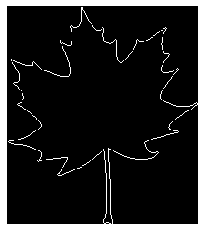

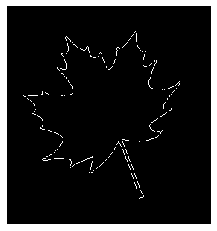

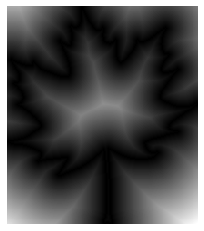

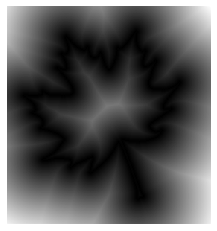

In [28]:
leaf1 = cv.imread('leaf.png',0).astype(np.float32)>128
imshow(leaf1)
leaf2 = cv.imread('leaf2.png',0).astype(np.float32)>128
imshow(leaf2)
lb1 = np.bitwise_xor(leaf1,erosion(leaf1))
imshow(lb1)
lb2 = np.bitwise_xor(leaf2,erosion(leaf2))
imshow(lb2)
lbdt1 = scipy.ndimage.distance_transform_edt(1-lb1)
imshow(lbdt1)
lbdt2 = scipy.ndimage.distance_transform_edt(1-lb2)
imshow(lbdt2)